# Table of Contents

# 1. Introduction

# 2. Architecture

# 3. Making Data

* 3.1 Input & Output shapes

* 3.2 Turning into tensors & train-test-split

# 4. Building a model

* Setup loss function and optimizer

# 5. Train model

* Building a loop

# 6. Making predictions and evaluating the model

# 7. Improving a model

* Non-linearity

# Introduction

##### Today, we are going to cover classification tasks using PyTorch.
##### A classification task involves predicting whether something is one thing or another.
##### The simplest is to check whether the object belong to class A or B.
##### This is referred to as a Binary Classification
##### Now, when there are more than two classes, it is referred to as a multi-class classification problem.
##### The other option is called a multi-label classification problem. 
##### This is where a single object can be assigned multiple labels. 
##### This is usually done by the model assigning different probabilities to the object.

# Architecture of a classification neural network

##### Now in order to create a model that can help us with classification task, we would need to understand and create an effective classification network.
##### Some of the basic skeleton of what it consists of are:
1) Input layer

2) Hidden layer
3) Neurons per hidden layer
4) Output layer
5) Hidden layer activation
6) Output activation
7) Loss function
8) Optimizer

##### Now that we know roughly what we are going to be building, let us make our dataset first.

# Making Data

In [24]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)

##### Let's view the first 5 values.

In [25]:
print(f"First 5 X features:\n{X[:5]}")
print(f"First 5 y features:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 y features:
[1 1 1 1 0]


##### We can see that for a single example, there are 2 input points and one output to predict.
##### Let's put these data into a single dataframe so that we can look at it more easily.

In [26]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0], "X2":X[:, 1], "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


##### Since we have 2 labels, this is a binary classification problem.

##### Let's visualize the y data points so that we can see what we are trying to predict.

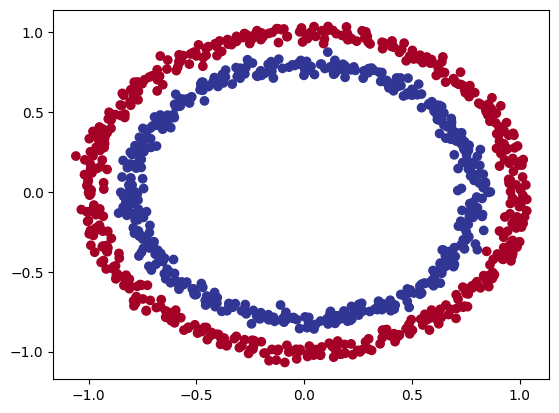

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

##### Seems like for every datapoint, we are trying to predict which circle it lies on.

## Input & Output shapes

##### Let us familiarise ourselves with the input and output shapes.

In [28]:
X.shape, y.shape

((1000, 2), (1000,))

##### We know that there are 1000 datapoints in total but what about the shape of a single datapoint?

In [29]:
X[0,:].shape, y[0].shape

((2,), ())

##### We know that for X, it has two features (vector) while y has a single feature (scalar).

## Turning into tensors & train-test-split

##### Remember that to use PyTorch to train on the data, we need to make the data into tensors to feed into the model.

In [30]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

##### Now that our data are in tensor form, let us split them into training and testing sets.
##### With scikit-learn, we can use the helpful function train_test_split().

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

##### Our data is all set with 800 training datapoints and 200 testing datapoints.

# Building a model

##### Let's first make sure to apply the same device for our tensors and model.
##### Since I'm running this on a M2 chip, I will be using Apple's Metal Performance Shaders (MPS).

In [32]:
from torch import nn

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device('cpu')
device

device(type='mps')

##### Let us create a model now.
##### For this model, we will create 2 nn.Linear layers in the constructor.

In [33]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self,x):
        return self.layer2(self.layer1(x))

model = model().to(device)
model

model(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

##### As you can see, our first linear layer takes in 2 input features, just like the second dimensions of our X data.
##### It will output 5 features which is then fed into a second layer.
##### The latter layer will output a single datapoint which is then taken as the prediction by the model.

##### The number 5 is also referring to the number of hidden nodes/units/neurons.
##### These are what gives neural networks that additional complexity and hopefully a significant boost in performance.
##### But it does not mean that the more hidden nodes we have, the better our model will be. 
##### The number and format of our hidden nodes is a hyperparameter that we would need to optimize.


##### Let's see what happens when we pass some data through it.

In [34]:
untrained_preds = model(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


##### As of now, these are just random, bogus figures. 
##### Let's set up our loss function and optimizer as steps to creating the optimal model.

## Setup loss function and optimizer

##### For binary classification problem, there are several loss function that we can use. 
##### Often, the binary cross entropy is used as the loss function.
##### For our optimizer, we would utilize the SGD (torch.optim.SGD()) to optimize our model parameters.

In [35]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.1)

##### Let's also create an evaluation metric.
##### While a loss function can be understood as a way to check how incorrect our predictions are, an evaluation metric can be understood as a way to check how well our predictions turned out.
##### One of the most basic evaluation metric is accuracy.
##### It is simply the percentage of correct predictions amongst all predictions.

In [36]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

# Train model

##### Before we train our model, let us take a look at what our model predicts.

In [37]:
y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='mps:0', grad_fn=<SliceBackward0>)

##### These numbers seem to be all over the place.
##### Thankfully, we have what we call a sigmoid function to limit these numerical figures to the ranges of 0 and 1.

In [38]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='mps:0', grad_fn=<SigmoidBackward0>)

##### These can be interpreted as prediction probabilities.
##### They show us how confident or sure the model is that the prediction is either 0 or 1.
##### The closer the value is to 0, the more confident the prediction is actually 0 while the closer the value is to 1, the more confident it is that the prediction is 1.

In [39]:
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='mps:0', grad_fn=<RoundBackward0>)

##### With our predictions in this format, we are not able to calculate the accuracy evaluation metric.
##### The sigmoid function used is referred to as the **activation function**.

## Building a loop

##### Let us now create a training loop for 100 epochs and output the model's progress every 10 epochs to keep track of our model's performance.

In [40]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()

    # Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch%10==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test loss: 0.69547, Test acc: 46.50%


##### Well... the model doesn't seem to be doing much better than just a monkey throwing darts at either 0 or 1.
##### What could be the problem?

# Making predictions and evaluating the model

##### We can use the helper_functions.py script which contains the plot_decision_boundary().
##### This will help us visualize the different points where our model is predicting certain classes.

In [41]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


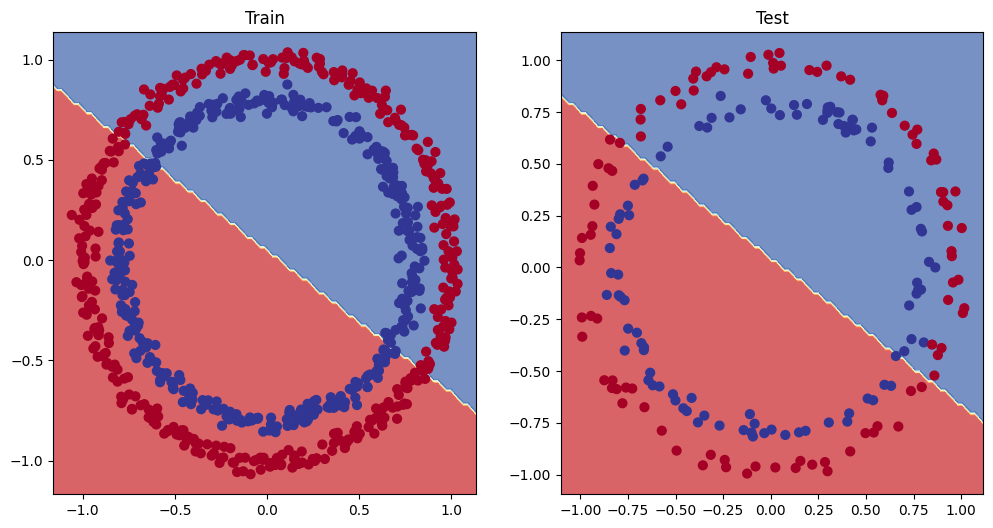

In [42]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

##### Now this definitely helps us spot why our model's performance was so poor.
##### The model was splitting the data using a straight line, classifying the ones in the red area as red data points and vice-versa.
##### This is what we call **underfitting**. 
##### It can be understood as when the model isn't learning all there is and all the necessary aspects of the data.
##### The common solution is to introduce more complexity to the model.

# Improving a model

##### Now there are several ways we can attempt to improve our model.
##### There are no guaranteed methods to improve our model or a 100% sure way.
##### Some of the most used methods are as such:
1) Add more layers

2) Add more hidden units

3) Fitting for longer (more epochs)

4) Changing the activation function

5) Changing the learning rate 

6) Changing the loss function

7) Use transfer learning

##### Many of these features are known as **hyperparameters**.
##### They are parameters fed into our model too but unlike normal parameters which the model learns through mathematical backpropagation, these are numerical figures that the user needs to figure out through experimentation.
##### Let's see what our improved model might look like.

In [43]:
class improved_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z

improved_model = improved_model().to(device)
improved_model

improved_model(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(improved_model.parameters(), lr = 0.1)

##### This time, let us try to train our model for a longer epoch.

In [45]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = improved_model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    improved_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = improved_model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


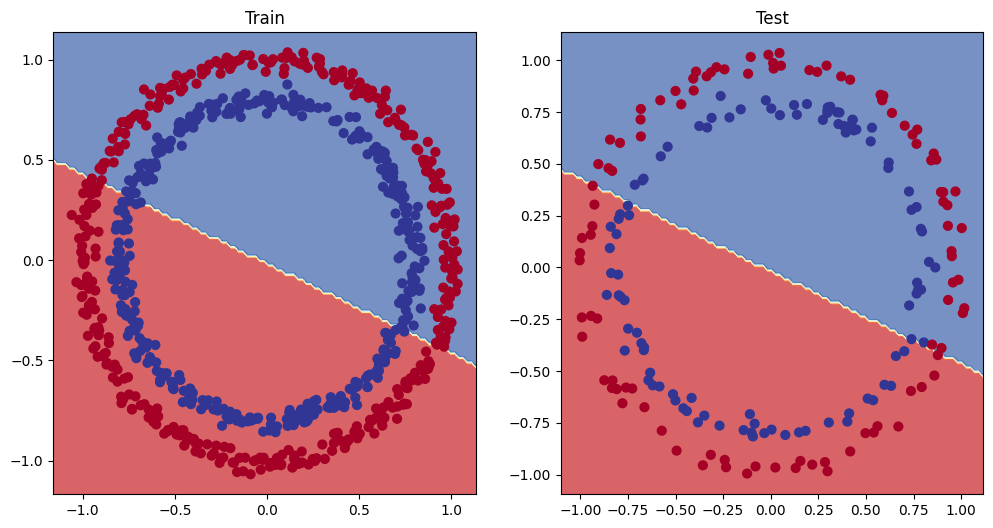

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(improved_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(improved_model, X_test, y_test)

##### Well, it is pretty obvious that changing the number of epochs and adding one more layer to our neural network is not helping our predictions.
##### If you look at the problem and visualize what the optimal decision boundary might look like, it should be a non-linear one. 
##### It should look circular and going inbetween the blue and red dots to divide up the points accordingly.
##### So, the problem was not with the number of epochs or model complexity, but the linear nature of our model.
##### We should have given it the power to learn from non-linear functions and patterns.

## Non-linearity

In [51]:
# Giving our model a non-linear activation function

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        z = self.relu(self.layer_1(x))
        z = self.relu(self.layer_2(z))
        z = self.layer_3(z)
        return z

model = model().to(device)
print(model)

model(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


##### The usual places to put the non-linear activation function are inbetween hidden layers and after the output layer.
##### However, this is not set in stone, so it is worth exploring and experimenting with different configurations.

In [52]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [53]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


##### Look at that!
##### Our introduction of non-linear activation function definitely seems to help now!

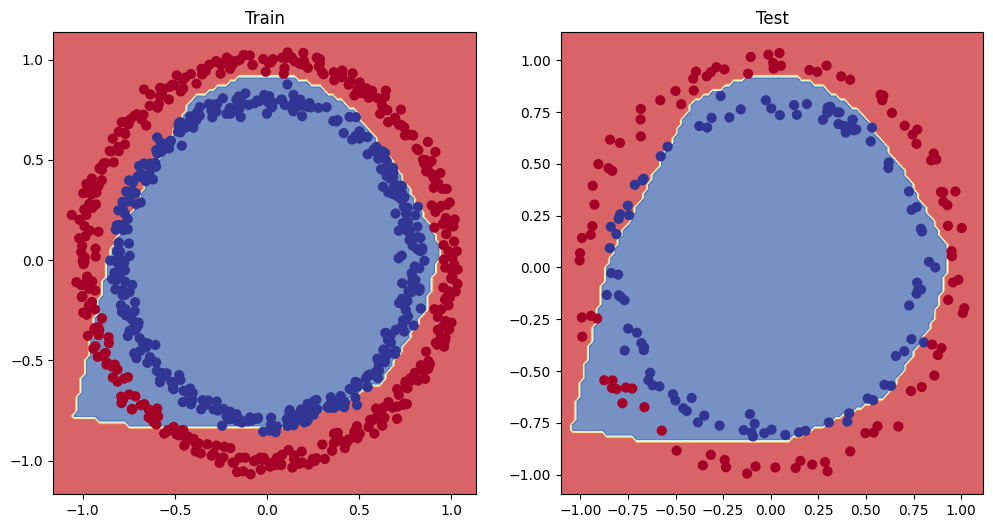

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

##### This just goes to show the power of non-linear activation functions!
##### There are tons of various non-linear activation functions out there.
##### You just have to remember that the power of PyTorch and neural networks, when it comes to complex tasks, comes from the fact that it harnesses the combined power of both linearity and non-linearity in it's architecture to spot and find out the patterns in the datasets.